# Multi Axial Political Analysis

## Exploratory Analysis
### Data Sources
- Tweets from congressmen downloaded from: https://alexlitel.github.io/congresstweets
    Tweets collected doesn't contain all the information provided by Twitter API. So we will use the id of each tweet to request the full JSON tweet information and extract additional features lyke location, favorites, retweets, etc.

- Twitter API: https://dev.twitter.com/overview/api

- Pro Publica Congress API: https://projects.propublica.org/api-docs/congress-api/api/
    Using the Congress API, we can retrieve legislative data from the House of Representatives, the Senate and the Library of Congress. The API includes details about members, votes, bills, nominations and other aspects of congressional activity.

## Part I Using Tweets from congresstweets:

In [4]:
import pandas as pd
import numpy as np
import tweepy
from textblob import TextBlob

import glob, os
os.chdir("../data")
counter = 0
for file in glob.glob("2017*.json"):
    print('Loading file {}'.format(file))
    if counter ==0:
        dfTweet = pd.read_json(file)
        counter = 1
    else:
        dfTweet = dfTweet.append(pd.read_json(file))
dfTweet.reset_index(inplace = True)
        

Loading file 2017-06-21.json
Loading file 2017-06-22.json
Loading file 2017-06-23.json
Loading file 2017-06-24.json
Loading file 2017-06-25.json
Loading file 2017-06-26.json
Loading file 2017-06-27.json
Loading file 2017-06-28.json
Loading file 2017-06-29.json
Loading file 2017-06-30.json
Loading file 2017-07-01.json
Loading file 2017-07-02.json
Loading file 2017-07-03.json
Loading file 2017-07-04.json
Loading file 2017-07-05.json
Loading file 2017-07-06.json
Loading file 2017-07-07.json
Loading file 2017-07-08.json
Loading file 2017-07-09.json
Loading file 2017-07-10.json
Loading file 2017-07-11.json
Loading file 2017-07-12.json
Loading file 2017-07-13.json
Loading file 2017-07-14.json
Loading file 2017-07-15.json
Loading file 2017-07-16.json
Loading file 2017-07-17.json
Loading file 2017-07-18.json
Loading file 2017-07-19.json
Loading file 2017-07-20.json


### How many twitter accounts are analyzed? How many tweets in total?

In [5]:
len(dfTweet.screen_name.unique())

867

In [6]:
len(dfTweet)

57061

### Top 10 Activity on twitter

In [7]:
dfTweet.screen_name.value_counts()[0:10]

auctnr1          1010
RepDonBeyer       920
RepJayapal        699
RepCloakroom      697
RosLehtinen       525
ChrisMurphyCT     382
SenBobCasey       378
RoKhanna          345
senorrinhatch     338
LacyClayMO1       333
Name: screen_name, dtype: int64

### We delete the congressmen with a few presence on twitter:

In [8]:
before = dfTweet.shape[0]

threshold = 10 # Anything that occurs less than this will be removed.
value_counts = dfTweet.stack().value_counts() # Entire DataFrame 
to_remove = value_counts[value_counts < threshold].index
dfTweet = dfTweet.loc[~dfTweet.screen_name.isin(to_remove)]

after = dfTweet.shape[0]
print before - after, "rows removed."

dfTweet['screen_name'].value_counts()

639 rows removed.


auctnr1            1010
RepDonBeyer         920
RepJayapal          699
RepCloakroom        697
RosLehtinen         525
ChrisMurphyCT       382
SenBobCasey         378
RoKhanna            345
senorrinhatch       338
LacyClayMO1         333
WhipHoyer           331
RepRaskin           319
keithellison        317
JohnCornyn          312
tedlieu             310
SenBookerOffice     301
SenateDems          301
brianschatz         297
DemCloakroom        295
RepMaloney          291
ChrisCoons          274
SenatorLeahy        274
CoryBooker          272
RepEspaillat        271
SenMarkey           264
SenatorBaldwin      263
SenJeffMerkley      259
RepYvetteClarke     253
SenFranken          250
HouseAgNews         247
                   ... 
DrRandPaul           12
Rep_Tom_Garrett      12
JackBergman_MI1      12
libertycaucus        12
repgregwalden        12
JoeCrowleyNY         12
Tom_Suozzi           12
KeithRothfus         12
stevestivers         11
RepLizCheney         11
JeffDenham      

### What is the average of sentiment polarity per politician?

In [9]:
dfTweet['sentiment'] = dfTweet['text'].apply(lambda x: TextBlob(x).sentiment.polarity)

#### Top 10 Positive Sentiment on tweets:

In [10]:
dfTweet.groupby('screen_name')['sentiment'].mean().reset_index().sort_values('sentiment', ascending=False)[0:10]

,screen_name,sentiment
427,RepSinema,0.486957
459,RepTrentKelly,0.482077
160,MikeCrapo,0.473607
147,LukeMesserIN,0.456925
181,PeterRoskam,0.449329
691,stevestivers,0.447595
675,repgregwalden,0.445833
408,RepRobWoodall,0.413838
381,RepMikeRogersAL,0.411368
585,TeamFlake,0.384531


#### Top 10 Negative Sentiment on tweets:

In [12]:
dfTweet.groupby('screen_name')['sentiment'].mean().reset_index().sort_values('sentiment', ascending=False)[-10:]

,screen_name,sentiment
240,RepCloakroom,-0.002272
38,DWStweets,-0.003385
668,repblumenauer,-0.006863
423,RepScottTaylor,-0.008333
415,RepRussell,-0.011019
238,RepCicilline,-0.014235
364,RepMarkTakano,-0.019603
631,dandonovan_ny,-0.029201
602,USRepKeating,-0.048144
117,JeffMerkley,-0.117386


# Part II: Using data from Propublica Congress API

Info Provided from tweets from congress is not enough, and is not easy to know the data about eaxh congressmen, We will use Pro Publica Congress API to obtain information of the complete congressmen, including twitter accounts. Then with this information we will get data directly from Twitter API. 

In [339]:
import requests
import json
PROPUBLICA_API_KEY = "XXXXXXX"

#### Extracting List of Members of US Senate

In [14]:
r = requests.get("https://api.propublica.org/congress/v1/115/senate/members.json", \
                 headers={"X-API-Key": PROPUBLICA_API_KEY});

In [17]:
dfSenate = pd.read_json(json.dumps(r.json()['results'][0]['members']))

In [18]:
dfSenate.shape

(101, 39)

In [19]:
list(dfSenate.columns)

[u'api_uri',
 u'contact_form',
 u'crp_id',
 u'cspan_id',
 u'date_of_birth',
 u'domain',
 u'dw_nominate',
 u'facebook_account',
 u'fax',
 u'first_name',
 u'google_entity_id',
 u'govtrack_id',
 u'icpsr_id',
 u'id',
 u'ideal_point',
 u'in_office',
 u'last_name',
 u'leadership_role',
 u'lis_id',
 u'middle_name',
 u'missed_votes',
 u'missed_votes_pct',
 u'next_election',
 u'ocd_id',
 u'office',
 u'party',
 u'phone',
 u'rss_url',
 u'senate_class',
 u'seniority',
 u'state',
 u'state_rank',
 u'total_present',
 u'total_votes',
 u'twitter_account',
 u'url',
 u'votes_with_party_pct',
 u'votesmart_id',
 u'youtube_account']

#### Extracting List of Members of US House of Representatives

In [20]:
r = requests.get("https://api.propublica.org/congress/v1/115/house/members.json", \
                 headers={"X-API-Key": PROPUBLICA_API_KEY});

In [21]:
dfHouse = pd.read_json(json.dumps(r.json()['results'][0]['members']))

In [22]:
dfHouse.shape

(446, 38)

In [23]:
list(dfHouse.columns)

[u'api_uri',
 u'contact_form',
 u'crp_id',
 u'cspan_id',
 u'date_of_birth',
 u'district',
 u'domain',
 u'dw_nominate',
 u'facebook_account',
 u'fax',
 u'first_name',
 u'geoid',
 u'google_entity_id',
 u'govtrack_id',
 u'icpsr_id',
 u'id',
 u'ideal_point',
 u'in_office',
 u'last_name',
 u'leadership_role',
 u'middle_name',
 u'missed_votes',
 u'missed_votes_pct',
 u'next_election',
 u'ocd_id',
 u'office',
 u'party',
 u'phone',
 u'rss_url',
 u'seniority',
 u'state',
 u'total_present',
 u'total_votes',
 u'twitter_account',
 u'url',
 u'votes_with_party_pct',
 u'votesmart_id',
 u'youtube_account']

#### Basic Analysis 

In [24]:
dfSenate.party.value_counts()

R    53
D    46
I     2
Name: party, dtype: int64

In [25]:
dfHouse.party.value_counts()

R    247
D    198
I      1
Name: party, dtype: int64

This API give us a summary of some important data that later we can analys in deep regarding votes:
- total_votes
- missed_votes
- missed_votes_pct
- votes_with_party_pct

The last one can give us some first approach of divergence between a congressmen and his party

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns


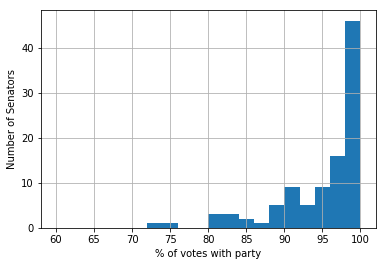

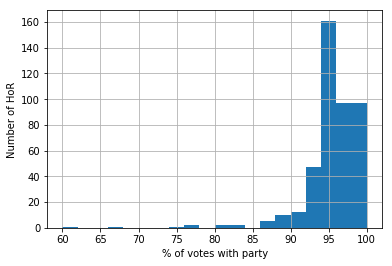

In [27]:
bins = range(60,102,2)
dfSenate.votes_with_party_pct.hist(bins = bins)
plt.ylabel('Number of Senators')
plt.xlabel('% of votes with party')
plt.show()

bins = range(60,102,2)
dfHouse.votes_with_party_pct.hist(bins = bins)
plt.ylabel('Number of HoR')
plt.xlabel('% of votes with party')
plt.show()

### Getting info of the votes since January 2017 for Senate

##### Senators

In [28]:
r = requests.get("https://api.propublica.org/congress/v1/senate/votes/2017/01.json", \
                 headers={"X-API-Key": PROPUBLICA_API_KEY});
dfSenateVotes = pd.read_json(json.dumps(r.json()['results']['votes']))
                             
r = requests.get("https://api.propublica.org/congress/v1/senate/votes/2017/02.json", \
                 headers={"X-API-Key": PROPUBLICA_API_KEY});
dfSenateVotes = dfSenateVotes.append(pd.read_json(json.dumps(r.json()['results']['votes'])))

r = requests.get("https://api.propublica.org/congress/v1/senate/votes/2017/03.json", \
                 headers={"X-API-Key": PROPUBLICA_API_KEY});
dfSenateVotes = dfSenateVotes.append(pd.read_json(json.dumps(r.json()['results']['votes'])))                                     

r = requests.get("https://api.propublica.org/congress/v1/senate/votes/2017/04.json", \
                 headers={"X-API-Key": PROPUBLICA_API_KEY});
dfSenateVotes = dfSenateVotes.append(pd.read_json(json.dumps(r.json()['results']['votes'])))
                                     
r = requests.get("https://api.propublica.org/congress/v1/senate/votes/2017/05.json", \
                 headers={"X-API-Key": PROPUBLICA_API_KEY});
dfSenateVotes = dfSenateVotes.append(pd.read_json(json.dumps(r.json()['results']['votes'])))

r = requests.get("https://api.propublica.org/congress/v1/senate/votes/2017/06.json", \
                 headers={"X-API-Key": PROPUBLICA_API_KEY});
dfSenateVotes = dfSenateVotes.append(pd.read_json(json.dumps(r.json()['results']['votes'])))

r = requests.get("https://api.propublica.org/congress/v1/senate/votes/2017/07.json", \
                 headers={"X-API-Key": PROPUBLICA_API_KEY});
dfSenateVotes = dfSenateVotes.append(pd.read_json(json.dumps(r.json()['results']['votes'])))

In [29]:
dfSenateVotes.reset_index(inplace = True)
dfSenateVotes.shape

(162, 23)

In [30]:
list(dfSenateVotes.columns)

['index',
 u'bill',
 u'congress',
 u'date',
 u'democratic',
 u'description',
 u'document_number',
 u'document_title',
 u'independent',
 u'nomination',
 u'question',
 u'republican',
 u'result',
 u'roll_call',
 u'session',
 u'source',
 u'tie_breaker',
 u'tie_breaker_vote',
 u'time',
 u'total',
 u'url',
 u'vote_type',
 u'vote_uri']

In [31]:
dfSenateVotes.result.value_counts(True)

Nomination Confirmed                    0.296296
Cloture Motion Agreed to                0.209877
Motion Rejected                         0.141975
Motion to Proceed Agreed to             0.104938
Joint Resolution Passed                 0.080247
Bill Passed                             0.030864
Amendment Agreed to                     0.018519
Motion Agreed to                        0.018519
Motion for Attendance Agreed to         0.012346
Amendment Rejected                      0.012346
Cloture Motion Rejected                 0.006173
Motion to Postpone Rejected             0.006173
Motion to Adjourn Rejected              0.006173
Concurrent Resolution Agreed to         0.006173
Decision of Chair Not Sustained         0.006173
Resolution of Ratification Agreed to    0.006173
Motion to Table Agreed to               0.006173
Motion to Reconsider Agreed to          0.006173
Resolution Agreed to                    0.006173
Motion to Proceed Rejected              0.006173
Decision of Chair Su

In [32]:
from time import sleep
counter = 0
for voteCall in dfSenateVotes.roll_call:
    print('Getting Roll Call Vote number: {}'.format(voteCall))
    r = requests.get("https://api.propublica.org/congress/v1/115/senate/sessions/1/votes/" + \
                     str(voteCall) + ".json", \
                 headers={"X-API-Key": PROPUBLICA_API_KEY});
    dftemp = pd.read_json(json.dumps(r.json()['results']['votes']['vote']['positions']))
    dftemp['roll_call'] = voteCall
    if counter == 0:
        dfVotes = dftemp
    else:
        dfVotes = dfVotes.append(dftemp)
    counter += 1
    sleep(0.2)
    
    

Getting Roll Call Vote number: 35
Getting Roll Call Vote number: 34
Getting Roll Call Vote number: 33
Getting Roll Call Vote number: 32
Getting Roll Call Vote number: 31
Getting Roll Call Vote number: 30
Getting Roll Call Vote number: 29
Getting Roll Call Vote number: 28
Getting Roll Call Vote number: 27
Getting Roll Call Vote number: 26
Getting Roll Call Vote number: 25
Getting Roll Call Vote number: 24
Getting Roll Call Vote number: 23
Getting Roll Call Vote number: 22
Getting Roll Call Vote number: 21
Getting Roll Call Vote number: 20
Getting Roll Call Vote number: 19
Getting Roll Call Vote number: 18
Getting Roll Call Vote number: 17
Getting Roll Call Vote number: 16
Getting Roll Call Vote number: 15
Getting Roll Call Vote number: 14
Getting Roll Call Vote number: 13
Getting Roll Call Vote number: 12
Getting Roll Call Vote number: 11
Getting Roll Call Vote number: 10
Getting Roll Call Vote number: 9
Getting Roll Call Vote number: 8
Getting Roll Call Vote number: 7
Getting Roll Call

In [33]:
dfVotes.shape

(16200, 4)

In [34]:
dfVotes.vote_position.value_counts()

Yes           10399
No             5523
Not Voting      273
Present           5
Name: vote_position, dtype: int64

### Clustering based on votes of Senate
1. First attemp using KMeans. We will use 2 clusters to validate that it can detect the two more obvious groups: Democrats and Republicans. The input variables will be each roll_call vote of each senator. 
2. To do it, we will prepare a pivot table and apply a conversion of the votes:
    - No: 0
    - Yes: 1
    - Any other will be 0.5

In [86]:
from sklearn.cluster import KMeans
from sklearn import metrics

def myFunc(x):
    if x=='Yes':
        return 1
    elif x=='No':
        return 0
    else:
        return 0.5

### We create a pivot table to use each vote for each roll as a input feature
mydata = dfVotes.pivot(index = 'member_id', columns = 'roll_call', values = 'vote_position')
mydata = mydata.applymap(lambda x: myFunc(x))
kmeans_model = KMeans(n_clusters=2, random_state=1).fit(mydata)
labels = kmeans_model.labels_


In [71]:
newDF = pd.DataFrame({'id':mydata.index.values,'class_k':labels})
classified = pd.merge(dfSenate, newDF, on='id', how='inner')

In [89]:
classified[['first_name','last_name','party','class_k']].groupby('party')['class_k'].sum()

party
D     0
I     0
R    53
Name: class_k, dtype: int32

We can see that it detect correctly to the 53 republicans. Both Independent Senators are classified as Democrats.

In [91]:
classified[['first_name','last_name','party','class_k']][classified.party == 'I']

,first_name,last_name,party,class_k
51,Angus,King,I,0
78,Bernard,Sanders,I,0


Bernard Sanders and Angus King are considered part of democrats according to the votes.

In [224]:
from sklearn.cluster import KMeans
from sklearn import metrics

def myFunc(x):
    if x=='Yes':
        return 1
    elif x=='No':
        return 0
    else:
        return 0.5

### We create a pivot table to use each vote for each roll as a input feature
mydata = dfVotes.pivot(index = 'member_id', columns = 'roll_call', values = 'vote_position')
mydata = mydata.applymap(lambda x: myFunc(x))
kmeans_model = KMeans(n_clusters=5, random_state=1).fit(mydata)
labels = kmeans_model.labels_

In [229]:
newDFS = pd.DataFrame({'id':mydata.index.values,'class_k':labels})
classified5 = pd.merge(dfSenate, newDFS, on='id', how='inner')

In [227]:
classified5[['first_name','last_name','party','class_k']]

,first_name,last_name,party,class_k
0,Lamar,Alexander,R,0
1,Roy,Blunt,R,0
2,Sherrod,Brown,D,1
3,Richard,Burr,R,0
4,Tammy,Baldwin,D,1
5,John,Boozman,R,0
6,John,Barrasso,R,0
7,Michael,Bennet,D,4
8,Richard,Blumenthal,D,1
9,Cory,Booker,D,3


In [97]:
classified5[['first_name','last_name','party','class_k']].class_k.value_counts()

0    53
1    30
4     7
3     7
2     4
Name: class_k, dtype: int64

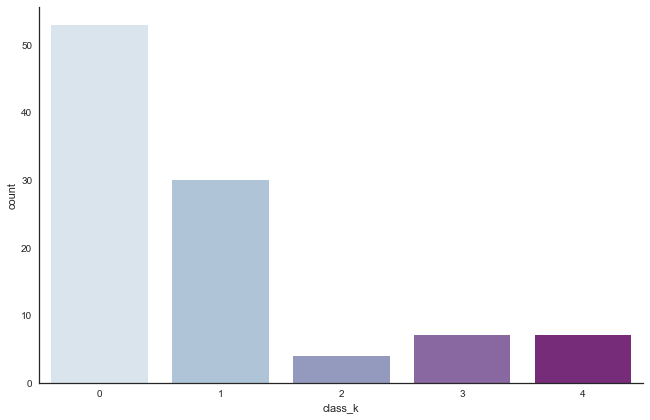

In [311]:
sns.set(style="white")
class_k = np.arange(0, 5)
g = sns.factorplot(x="class_k", data=classified5, kind="count",
                   palette="BuPu", size=6, aspect=1.5, order=class_k)
g.set_xticklabels(step=1)
plt.show()

In [127]:
dfSenate.to_csv('dfSenate.csv')
dfHouse.to_csv('dfHouse.csv',encoding='utf-8')
dfSenateVotes.to_csv('dfSenateVotes.csv',encoding='utf-8')
dfVotes.to_csv('dfVotes.csv',encoding='utf-8')

### Getting Votes of House of Representatives

In [138]:
for i in range(1,8):
    print ('Getting Votes Session: 0{}'.format(i))
    r = requests.get("https://api.propublica.org/congress/v1/house/votes/2017/0" \
                     + str(i) +".json", \
                 headers={"X-API-Key": PROPUBLICA_API_KEY});
    if i == 1:
        dfHoRVotes = pd.read_json(json.dumps(r.json()['results']['votes']))
    else:
        dfHoRVotes = dfHoRVotes.append(pd.read_json(json.dumps(r.json()['results']['votes'])))
    sleep(0.5)        



Getting Votes Session: 01
Getting Votes Session: 02
Getting Votes Session: 03
Getting Votes Session: 04
Getting Votes Session: 05
Getting Votes Session: 06
Getting Votes Session: 07


In [142]:
dfHoRVotes.reset_index(inplace = True)
dfHoRVotes.shape

(406, 18)

In [340]:
dfHoRVotes.head()

,index,bill,congress,date,democratic,description,independent,question,republican,result,roll_call,session,source,time,total,url,vote_type,vote_uri
0,0,{u'api_uri': u'https://api.propublica.org/cong...,115,2017-01-31,"{u'not_voting': 7, u'yes': 0, u'majority_posit...","Providing for consideration of H.J. Res. 38, d...","{u'not_voting': 0, u'yes': 0, u'present': 0, u...",On Agreeing to the Resolution,"{u'not_voting': 4, u'yes': 236, u'majority_pos...",Passed,69,1,http://clerk.house.gov/evs/2017/roll069.xml,17:25:00,"{u'not_voting': 10, u'yes': 236, u'present': 0...",http://clerk.house.gov/evs/2017/roll069.xml,RECORDED VOTE,https://api.propublica.org/congress/v1/115/hou...
1,1,{u'api_uri': u'https://api.propublica.org/cong...,115,2017-01-31,"{u'not_voting': 9, u'yes': 1, u'majority_posit...","Providing for consideration of H.J. Res. 38, d...","{u'not_voting': 0, u'yes': 0, u'present': 0, u...",On Ordering the Previous Question,"{u'not_voting': 5, u'yes': 235, u'majority_pos...",Passed,68,1,http://clerk.house.gov/evs/2017/roll068.xml,17:18:00,"{u'not_voting': 13, u'yes': 236, u'present': 0...",http://clerk.house.gov/evs/2017/roll068.xml,YEA-AND-NAY,https://api.propublica.org/congress/v1/115/hou...
2,2,{u'api_uri': u'https://api.propublica.org/cong...,115,2017-01-30,"{u'not_voting': 16, u'yes': 177, u'majority_po...",Ocmulgee Mounds National Historical Park Bound...,"{u'not_voting': 0, u'yes': 0, u'present': 0, u...","On Motion to Suspend the Rules and Pass, as Am...","{u'not_voting': 13, u'yes': 219, u'majority_po...",Passed,67,1,http://clerk.house.gov/evs/2017/roll067.xml,19:00:00,"{u'not_voting': 28, u'yes': 396, u'present': 0...",http://clerk.house.gov/evs/2017/roll067.xml,2/3 YEA-AND-NAY,https://api.propublica.org/congress/v1/115/hou...
3,3,{u'api_uri': u'https://api.propublica.org/cong...,115,2017-01-30,"{u'not_voting': 33, u'yes': 160, u'majority_po...",To remove the sunset provision of section 203 ...,"{u'not_voting': 0, u'yes': 0, u'present': 0, u...",On Motion to Suspend the Rules and Pass,"{u'not_voting': 12, u'yes': 228, u'majority_po...",Passed,66,1,http://clerk.house.gov/evs/2017/roll066.xml,18:50:00,"{u'not_voting': 44, u'yes': 388, u'present': 0...",http://clerk.house.gov/evs/2017/roll066.xml,2/3 YEA-AND-NAY,https://api.propublica.org/congress/v1/115/hou...
4,4,{u'api_uri': u'https://api.propublica.org/cong...,115,2017-01-24,"{u'not_voting': 7, u'yes': 3, u'majority_posit...",To prohibit taxpayer funded abortions,"{u'not_voting': 0, u'yes': 0, u'present': 0, u...",On Passage,"{u'not_voting': 5, u'yes': 235, u'majority_pos...",Passed,65,1,http://clerk.house.gov/evs/2017/roll065.xml,16:48:00,"{u'not_voting': 11, u'yes': 238, u'present': 0...",http://clerk.house.gov/evs/2017/roll065.xml,RECORDED VOTE,https://api.propublica.org/congress/v1/115/hou...


In [145]:
list(dfHoRVotes.columns)

['index',
 u'bill',
 u'congress',
 u'date',
 u'democratic',
 u'description',
 u'independent',
 u'question',
 u'republican',
 u'result',
 u'roll_call',
 u'session',
 u'source',
 u'time',
 u'total',
 u'url',
 u'vote_type',
 u'vote_uri']

In [147]:
dfHoRVotes.result.value_counts(True)

Passed       0.652709
Failed       0.288177
Agreed to    0.056650
Ryan (WI)    0.002463
Name: result, dtype: float64

In [170]:
from time import sleep
counter = 0
flag =0
for voteCall in dfHoRVotes.roll_call:
    print('Getting Roll Call Vote number: {}'.format(voteCall))
    if voteCall ==2:
        flag = 2
    else:
        r = requests.get("https://api.propublica.org/congress/v1/115/house/sessions/1/votes/" + \
                     str(voteCall) + ".json", \
                 headers={"X-API-Key": PROPUBLICA_API_KEY});
        dftemp = pd.read_json(json.dumps(r.json()['results']['votes']['vote']['positions']))
        dftemp['roll_call'] = voteCall
        print(dftemp.shape)
        if counter == 0:
            dfVotesH = dftemp
        else:
            dfVotesH = dfVotesH.append(dftemp)
    counter += 1
    print(dfVotesH.shape)
    sleep(1)
    



Getting Roll Call Vote number: 69
(433, 4)
(433, 4)
Getting Roll Call Vote number: 68
(433, 4)
(866, 4)
Getting Roll Call Vote number: 67
(433, 4)
(1299, 4)
Getting Roll Call Vote number: 66
(433, 4)
(1732, 4)
Getting Roll Call Vote number: 65
(433, 4)
(2165, 4)
Getting Roll Call Vote number: 64
(433, 4)
(2598, 4)
Getting Roll Call Vote number: 63
(433, 4)
(3031, 4)
Getting Roll Call Vote number: 62
(433, 4)
(3464, 4)
Getting Roll Call Vote number: 61
(435, 4)
(3899, 4)
Getting Roll Call Vote number: 60
(435, 4)
(4334, 4)
Getting Roll Call Vote number: 59
(435, 4)
(4769, 4)
Getting Roll Call Vote number: 58
(435, 4)
(5204, 4)
Getting Roll Call Vote number: 57
(435, 4)
(5639, 4)
Getting Roll Call Vote number: 56
(435, 4)
(6074, 4)
Getting Roll Call Vote number: 55
(435, 4)
(6509, 4)
Getting Roll Call Vote number: 54
(435, 4)
(6944, 4)
Getting Roll Call Vote number: 53
(435, 4)
(7379, 4)
Getting Roll Call Vote number: 52
(435, 4)
(7814, 4)
Getting Roll Call Vote number: 51
(435, 4)
(8249

(430, 4)
(65314, 4)
Getting Roll Call Vote number: 164
(430, 4)
(65744, 4)
Getting Roll Call Vote number: 163
(430, 4)
(66174, 4)
Getting Roll Call Vote number: 162
(430, 4)
(66604, 4)
Getting Roll Call Vote number: 161
(430, 4)
(67034, 4)
Getting Roll Call Vote number: 160
(430, 4)
(67464, 4)
Getting Roll Call Vote number: 159
(430, 4)
(67894, 4)
Getting Roll Call Vote number: 158
(430, 4)
(68324, 4)
Getting Roll Call Vote number: 157
(430, 4)
(68754, 4)
Getting Roll Call Vote number: 156
(430, 4)
(69184, 4)
Getting Roll Call Vote number: 155
(430, 4)
(69614, 4)
Getting Roll Call Vote number: 154
(430, 4)
(70044, 4)
Getting Roll Call Vote number: 153
(430, 4)
(70474, 4)
Getting Roll Call Vote number: 152
(430, 4)
(70904, 4)
Getting Roll Call Vote number: 151
(430, 4)
(71334, 4)
Getting Roll Call Vote number: 150
(430, 4)
(71764, 4)
Getting Roll Call Vote number: 149
(430, 4)
(72194, 4)
Getting Roll Call Vote number: 148
(430, 4)
(72624, 4)
Getting Roll Call Vote number: 147
(430, 4)
(

(434, 4)
(129076, 4)
Getting Roll Call Vote number: 329
(434, 4)
(129510, 4)
Getting Roll Call Vote number: 328
(434, 4)
(129944, 4)
Getting Roll Call Vote number: 327
(434, 4)
(130378, 4)
Getting Roll Call Vote number: 326
(434, 4)
(130812, 4)
Getting Roll Call Vote number: 325
(434, 4)
(131246, 4)
Getting Roll Call Vote number: 324
(434, 4)
(131680, 4)
Getting Roll Call Vote number: 323
(432, 4)
(132112, 4)
Getting Roll Call Vote number: 322
(432, 4)
(132544, 4)
Getting Roll Call Vote number: 321
(432, 4)
(132976, 4)
Getting Roll Call Vote number: 320
(432, 4)
(133408, 4)
Getting Roll Call Vote number: 319
(432, 4)
(133840, 4)
Getting Roll Call Vote number: 318
(432, 4)
(134272, 4)
Getting Roll Call Vote number: 317
(432, 4)
(134704, 4)
Getting Roll Call Vote number: 316
(432, 4)
(135136, 4)
Getting Roll Call Vote number: 315
(432, 4)
(135568, 4)
Getting Roll Call Vote number: 314
(432, 4)
(136000, 4)
Getting Roll Call Vote number: 313
(432, 4)
(136432, 4)
Getting Roll Call Vote numb

In [171]:
dfVotesH.shape

(174977, 4)

In [177]:
dfVotesH.vote_position.value_counts()

Yes           103473
No             65392
Not Voting      5231
Present          482
Speaker          399
Name: vote_position, dtype: int64

In [173]:
dfVotesH

,dw_nominate,member_id,vote_position,roll_call
0,0.493,A000374,Yes,69
1,-0.462,A000370,No,69
2,0.360,A000055,Yes,69
3,-0.273,A000371,No,69
4,0.614,A000372,Yes,69
5,0.684,A000367,Yes,69
6,0.388,A000369,Yes,69
7,NaN,A000375,Yes,69
8,0.716,B001291,Yes,69
9,NaN,B001298,Yes,69


### Clustering based on votes of House of Representative
1. First attemp using KMeans. We will use 2 clusters to validate that it can detect the two more obvious groups: Democrats and Republicans. The input variables will be each roll_call vote of each senator. 
2. To do it, we will prepare a pivot table and apply a conversion of the votes:
    - No: 0
    - Yes: 1
    - Any other will be 0.5

In [178]:
from sklearn.cluster import KMeans
from sklearn import metrics

def myFunc(x):
    if x=='Yes':
        return 1
    elif x=='No':
        return 0
    else:
        return 0.5

### We create a pivot table to use each vote for each roll as a input feature
mydata = dfVotesH.pivot(index = 'member_id', columns = 'roll_call', values = 'vote_position')
mydata = mydata.applymap(lambda x: myFunc(x))
kmeans_model = KMeans(n_clusters=2, random_state=1).fit(mydata)
labels = kmeans_model.labels_

In [182]:
newDFH = pd.DataFrame({'id':mydata.index.values,'class_k':labels})
classifiedH = pd.merge(dfHouse, newDFH, on='id', how='inner')
classifiedH[['first_name','last_name','party','class_k']].groupby('party')['class_k'].sum()

party
D    195
R      4
Name: class_k, dtype: int32

In [202]:
brief = classifiedH[['first_name','last_name','party','class_k']]
brief[(brief['party']=='R' )][ brief['class_k']==0].shape

/Users/David/dataIncubator/lib/python2.7/site-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


(241, 4)

In [203]:
brief[(brief['party']=='D' )][ brief['class_k']==0]

/Users/David/dataIncubator/lib/python2.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,first_name,last_name,party,class_k


### Creating 5 clusters for House of Representatives

In [310]:
from sklearn.cluster import KMeans
from sklearn import metrics

def myFunc(x):
    if x=='Yes':
        return 1
    elif x=='No':
        return 0
    else:
        return 0.5

### We create a pivot table to use each vote for each roll as a input feature
mydata = dfVotesH.pivot(index = 'member_id', columns = 'roll_call', values = 'vote_position')
mydata = mydata.applymap(lambda x: myFunc(x))
kmeans_model = KMeans(n_clusters=5, random_state=1).fit(mydata)
labels = kmeans_model.labels_
newDFH = pd.DataFrame({'id':mydata.index.values,'class_k':labels})
classifiedH5 = pd.merge(dfHouse, newDFH, on='id', how='inner')
classifiedH5[['first_name','last_name','party','class_k']]

,first_name,last_name,party,class_k
0,Robert,Aderholt,R,1
1,Justin,Amash,R,2
2,Mark,Amodei,R,1
3,Alma,Adams,D,3
4,Pete,Aguilar,D,3
5,Rick,Allen,R,1
6,Ralph,Abraham,R,1
7,Jodey,Arrington,R,1
8,Joe,Barton,R,1
9,Xavier,Becerra,D,4


In [313]:
classifiedH5[['first_name','last_name','party','class_k']].class_k.value_counts()

1    150
3    100
0     93
2     85
4     12
Name: class_k, dtype: int64

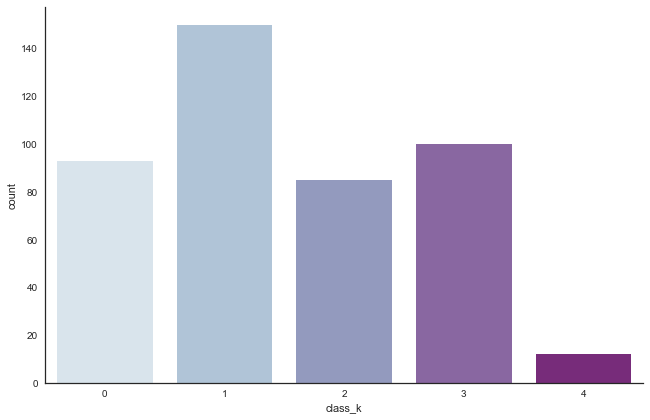

In [314]:
sns.set(style="white")
class_k = np.arange(0, 5)
g = sns.factorplot(x="class_k", data=classifiedH5, kind="count",
                   palette="BuPu", size=6, aspect=1.5, order=class_k)
g.set_xticklabels(step=1)
plt.show()

## Data Preparation to use D3js
We will show a graph with each one of the categories of Senate as circles. Every circle dimension will depend on the number of twitter followers.

##### Get the number of followers of each member of Senate

In [210]:
import tweepy
from tweepy import OAuthHandler

consumer_key = ''
consumer_secret = ''
access_token = ''
access_secret = ''

In [217]:
def getFollowers(listCandidates):
    ids = []
    followers = []
    for candidate in listCandidates:
        try:
            res = api.get_user(candidate)
            print res.id
            print res.followers_count
            ids.append(res.id)
            followers.append(res.followers_count)
        except: 
            ids.append('None')
            followers.append(0)
            pass
            #mydata = json.loads(res)
        #print mydata
    dfCandidates = pd.DataFrame({'Candidato':listCandidates, 'id':ids, 'followers':followers})
    return dfCandidates

In [218]:
auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)
api = tweepy.API(auth)
listCandidates = dfSenate.twitter_account.values
infoCandidates = getFollowers(listCandidates)

76649729
58337
21269970
65302
43910797
133708
21157904
80003
1074518754
44548
5558312
48184
202206694
56145
224285242
63507
278124059
122782
15808765
3229862
117501995
82385
109071031
144377
249787913
56024
555474658
42614
600463589
41468
19726613
127378
193794406
34367
13218102
110419
171598736
188053
73303753
102042
435500714
6159
968650362
78507
1074480192
984115
811313565760163844
13284
247334603
184598
216503958
59355
11651202
14727
1058520120
85714
291756142
44372
2856787757
24572
476256944
291448
16056306
65180
171968009
212829
1071402577
40244
14845376
113221
10615232
131165
72198806
473522
235217558
35659
262756641
39701
266133081
55669
92186819
46555
1099199839
67675
382791093
40053
1061029050
51395
803694179079458816
206062
946549322
38165
20546536
13729
78403308
40252
233737858
63911
1068481578
67533
1267940407
5838
816683274076614656
4643
242836537
93569
225921757
35667
88784440
332997
21406834
63650
19394188
2335747
339822881
76565
18695134
108545
18632666
49788
293131808

In [281]:
infoCandidates.head()

,Candidato,followers,id
0,SenAlexander,58337,76649729
1,RoyBlunt,65302,21269970
2,SenSherrodBrown,133708,43910797
3,SenatorBurr,80003,21157904
4,SenatorBaldwin,44548,1074518754


In [231]:
dfSenateFollowers = pd.merge(classified5, infoCandidates, \
                             left_on='twitter_account', right_on='Candidato', how='inner')

In [235]:
briefSenate = dfSenateFollowers[['first_name','last_name','party','class_k','followers']]

In [237]:
briefSenate['full_name'] = briefSenate['first_name'] + ' '+ briefSenate['last_name']

/Users/David/dataIncubator/lib/python2.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [287]:
groupedT = briefSenate[['class_k','full_name','followers']]

In [268]:
j = (groupedT.groupby(['class_k'], as_index=False)
        .apply(lambda x: x[['full_name','followers']].to_dict('r'))
        .reset_index()
        .rename(columns={0:'children'})
        .to_json(orient='records'))

In [280]:
with open('graph1.json', 'w') as outfile:
    outfile.write(j)

In [315]:
api = tweepy.API(auth)
listCandidates = dfHouse.twitter_account.values
infoCandidates = getFollowers(listCandidates)

76452765
15785
402719755
10306
2916086925
7793
3018670151
6097
2964287128
5603
2962891515
5799
816284664658874368
2206
19929362
25198
824281456079933442
35
249410485
13773
137823987
3085
19926675
26828
148453195
11311
278145569
33474
15751083
23853
148006729
2543
432676344
13545
26051676
21700
20467163
23588
239871673
17227
239949176
51889
110545675
20768
237299871
19777
234812598
14592
558769636
15197
1531521632
17075
1089334250
12193
1092757885
22186
1074101017
13562
1243902714
9247
1092979962
21756
950783972
21686
2253968388
13318
2560169238
9319
2929491549
6570
2962868158
35638
2914571740
7964
2965083477
7891
2964877294
4282
231108733
11032
2862577383
9181
816131319033950208
2899
816833925456789505
4715
815241612154417152
2097
816652616625168388
2886
817050219007328258
2465
817138492614524928
1771
22545491
11510
237750442
20844
188019606
51656
138770045
37090
22523087
16143
787373558
124824
747806211983179776
6744
111635980
24018
24183358
13248
18030431
13469
23124635
14860
2454518

In [317]:
infoCandidates.head()

,Candidato,followers,id
0,Robert_Aderholt,15785,76452765
1,None,0,None
2,MarkAmodeiNV2,10306,402719755
3,RepAdams,7793,2916086925
4,reppeteaguilar,6097,3018670151


In [331]:
dfHouseFollowers = pd.merge(classifiedH5, infoCandidates, \
                             left_on='twitter_account', right_on='Candidato', how='inner')
briefHouse = dfHouseFollowers[['first_name','last_name','party','class_k','followers']]
briefHouse['full_name'] = briefHouse['first_name'] + ' '+ briefHouse['last_name']
groupedTHouse = briefHouse[['class_k','full_name','followers']]
groupedTHouse = groupedTHouse.rename(columns={'full_name': 'name', 'followers': 'size'})
j = (groupedTHouse.groupby(['class_k'], as_index=False)
        .apply(lambda x: x[['name','size']].to_dict('r'))
        .reset_index()
        .rename(columns={0:'children','index':'name'})
        .to_json(orient='records'))

/Users/David/dataIncubator/lib/python2.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [332]:
with open('graph2.json', 'w') as outfile:
    outfile.write(j)

### Preparing Graph2 "Word Maps"

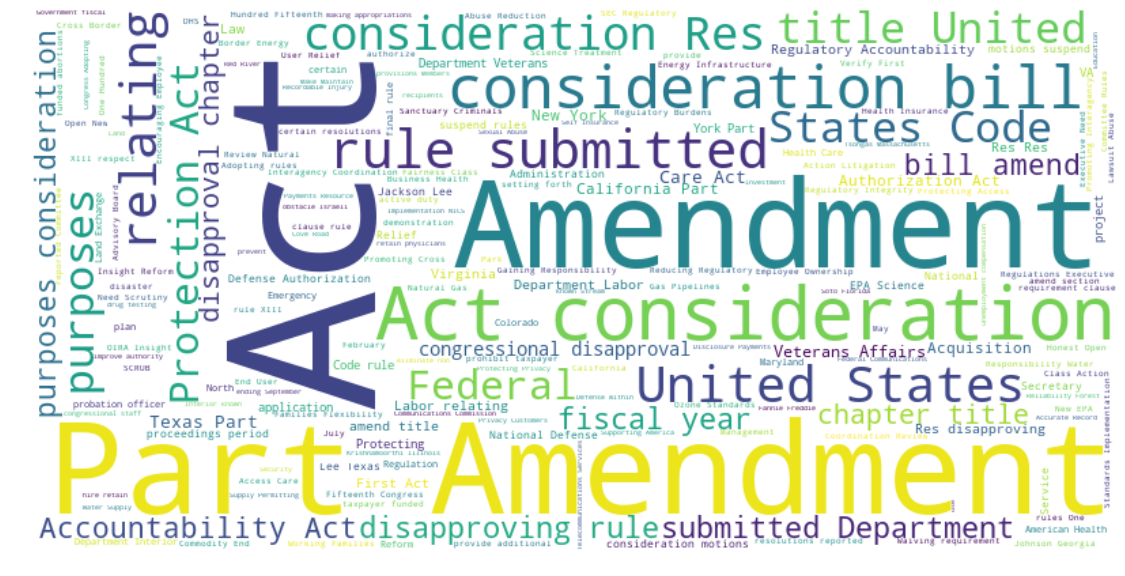

In [338]:
from wordcloud import WordCloud, STOPWORDS

#text = open(path.join(d, 'constitution.txt')).read()
text = ""
for desc in dfHoRVotes.description:
    text = text + ' ' + desc
# Generate a word cloud image
stopwords = set(STOPWORDS)
stopwords.add("Providing")

wordcloud = WordCloud(background_color="white", max_words=200, 
               stopwords=stopwords,width = 800, height = 400).generate(text)

# Display the generated image:
plt.figure( figsize=(20,10) )

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()


Generating WORD MAP


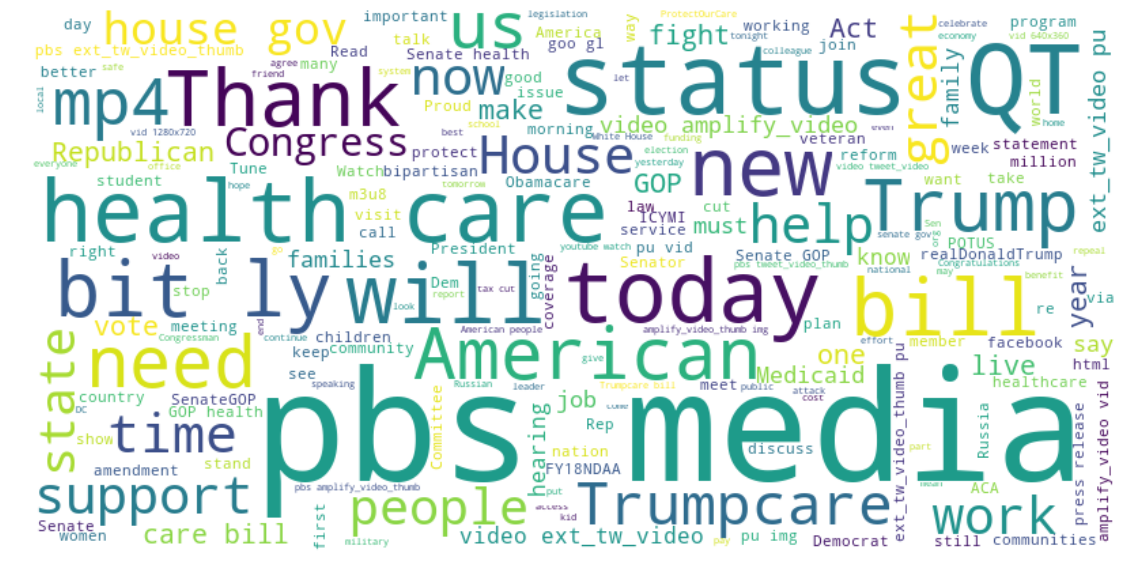

In [337]:
text = ""
for tweet in dfTweet.sample(frac = 0.1).text:
    text = text + ' ' + tweet
stopwords = set(STOPWORDS)
stopwords.add("https")
stopwords.add("RT")
stopwords.add("CO")
stopwords.add("jpg")
stopwords.add("twimg")
stopwords.add("amp")
stopwords.add("twitter")





print('Generating WORD MAP')
wordcloud = WordCloud(background_color="white", max_words=200, 
               stopwords=stopwords,width = 800, height = 400).generate(text)

plt.figure( figsize=(20,10) )
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

